In [3]:
from sklearn.datasets import load_iris
iris = load_iris() #loading İris data set from sklearn.datasets


In [6]:
print(iris.keys()) #keys in the dataset

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
print(iris['DESCR']) # summary of dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [9]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
print(type(iris['data']))

<class 'numpy.ndarray'>


In [12]:
print(iris['data'].shape) # two dimensions

(150, 4)


In [13]:
print(iris['data'][:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [27]:
print(iris['target'])
# 150 values encoded with the numbers 0,1,2
# 0: setosa , 1: versicolor, 2:virginica

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [28]:
print(type(iris['target']))
# 150 values encoded with the numbers 0,1,2
# 0: setosa , 1: versicolor, 2:virginica

<class 'numpy.ndarray'>


We divide the data set into two parts, one of them is used to set up the ML model (training data) and the second part is used to evaluate how the model works(test data).

In [29]:
#f(X) = y

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'],
                                                   random_state=0)
# train_test_split function we can get data from all classes by mixing dataset
# we divide the dataset into two parts

In [32]:
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


In [33]:
print(X_test.shape)
print(y_test.shape)

(38, 4)
(38,)


In [34]:
import pandas as pd

In [36]:
iris_df = pd.DataFrame(X_train, columns= iris.feature_names)
# we convert X_train numpySeries to pandas datafarame for see scatterplot

In [45]:
from pandas.plotting import scatter_matrix

In [46]:
# %matplotlib inline 

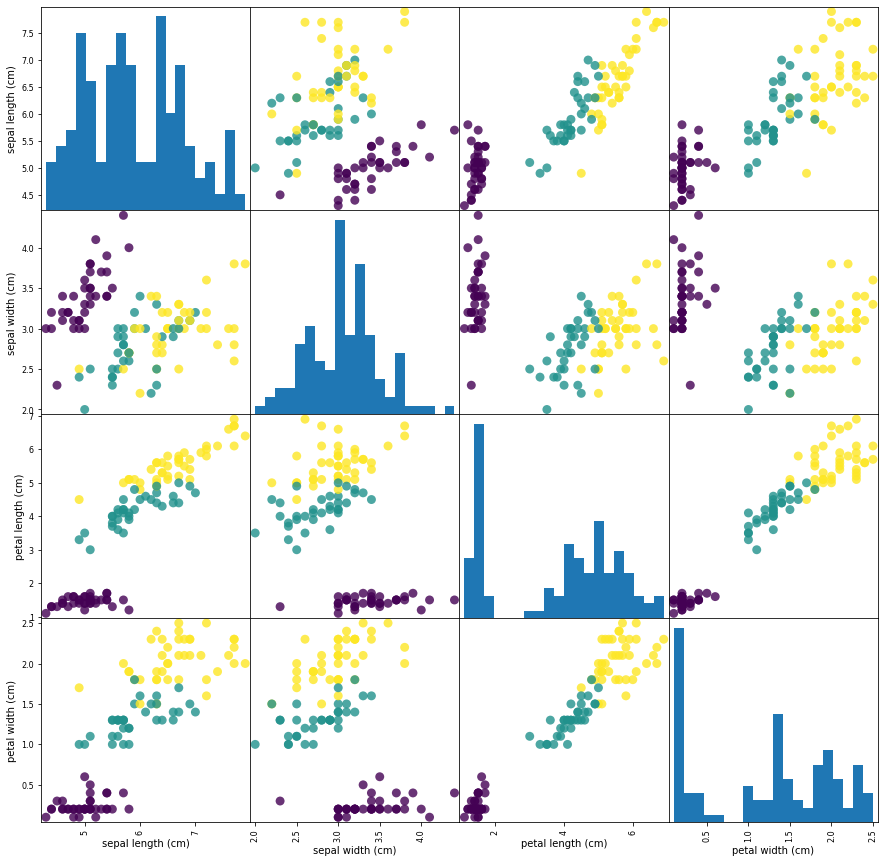

In [49]:
scatter_matrix(iris_df, c=y_train, figsize = (15,15), marker='o',
              hist_kwds = {'bins':20}, s=80, alpha=0.8);
#Our ML model can learn well because the three classes are well separated from each other.

## Creating Model

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=1)

In [54]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
import numpy as np
X_new = np.array([[5,2.9,1,0.2]]) # sepal length in cm  sepal width in cm petal length in cm petal width in cm
X_new.shape
# sklearn always expect two dimensional sques

(1, 4)

In [66]:
pred = knn.predict(X_new) # predict kind of iris 
print('Prediction class: ', pred)
print('Prediction tpye: ', iris['target_names'][pred])
#

Prediction class:  [0]
Prediction tpye:  ['setosa']


### Model Performance

In [67]:
y_pred = knn.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [70]:
print(np.mean(y_pred == y_test))
#the average of how much the predicted species are equal to the real species
# we predict %97 correctly

0.9736842105263158


In [71]:
print(knn.score(X_test,y_test))

0.9736842105263158
